<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Colab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.



In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


#Digits dataset


The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., ‘png’ files), we would load them using matplotlib.pyplot.imread.



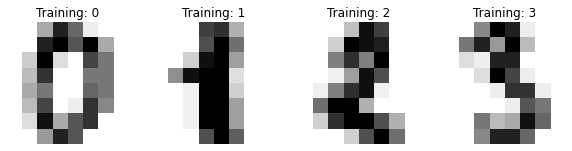

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

#Classification

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.


We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted digit value in the title.



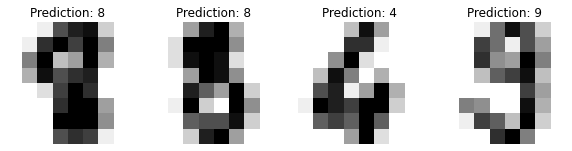

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

classification_report builds a text report showing the main classification metrics.



In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a confusion matrix of the true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


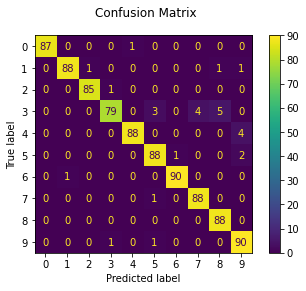

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Total running time of the script: ( 0 minutes 0.925 seconds)

#Capture Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
#Capture camera
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


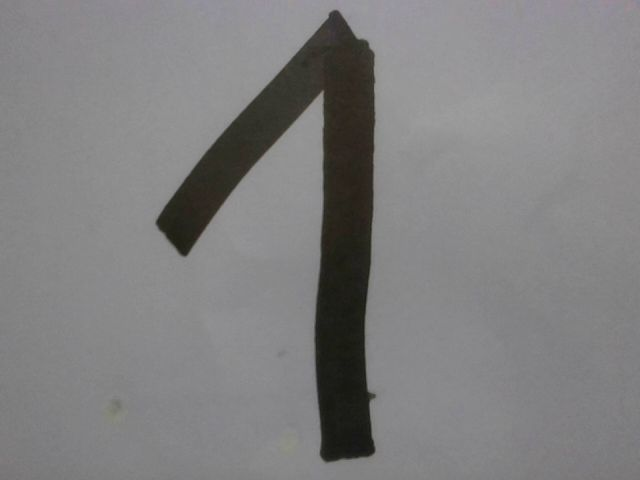

In [ ]:
#Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  

#Xử lý ảnh về trắng đen

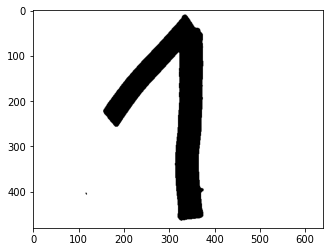

In [ ]:
#Link tham khảo: https://www.it-swarm-vi.com/vi/python/chuyen-doi-hinh-anh-opencv-sang-den-trang/939703473/
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("photo.jpg")
# Đọc ảnh thang độ xám
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image_gray,(5,5),0)
#Chuyển đổi hình ảnh thang độ xám thành nhị phân
im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)
#Show ảnh đã xử lý
plt.imshow(thre, cmap = 'gray')
ret,thresh2 = cv2.threshold(thre,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

#Resize Images

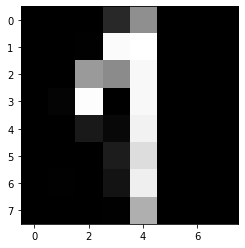

In [ ]:
a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)
a = a/255 * 13
plt.imshow(a, cmap = 'gray')
a = a.reshape(1, 64)

#Predict

In [ ]:
predict = clf.predict(a)
print("Result predict:",predict)

Result predict: [1]


#Truy cập ảnh từ drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Số lượng ảnh từ drive: 20


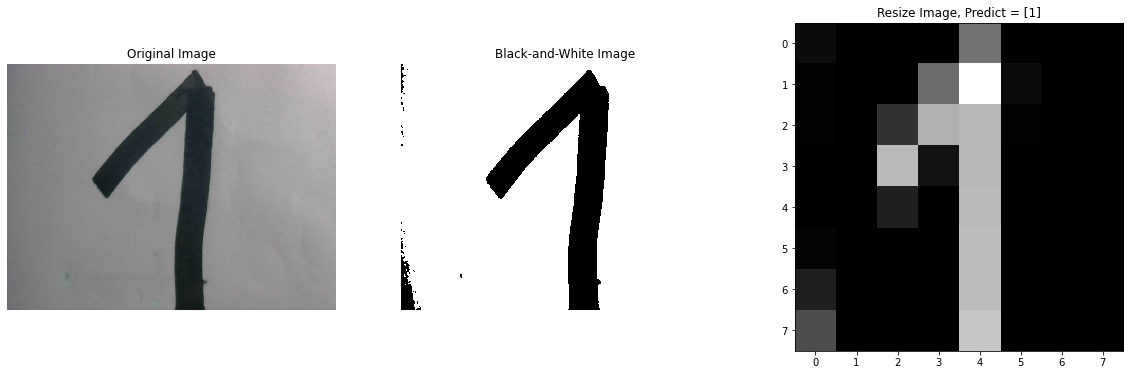

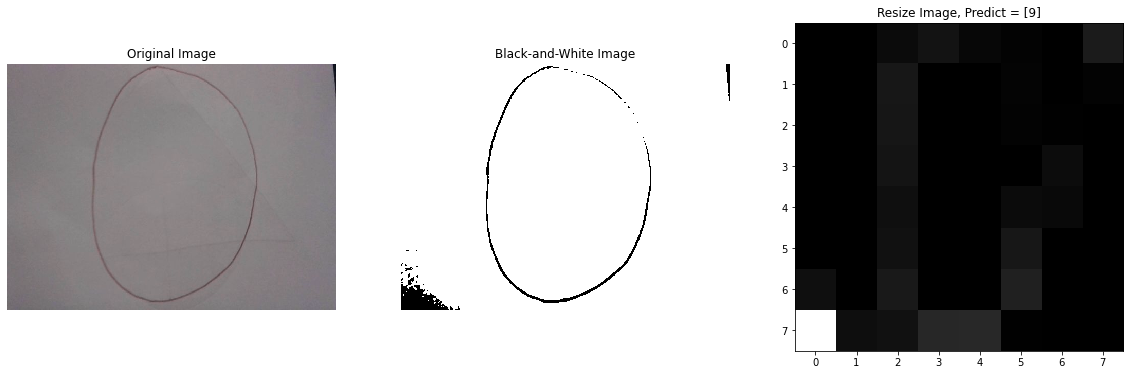

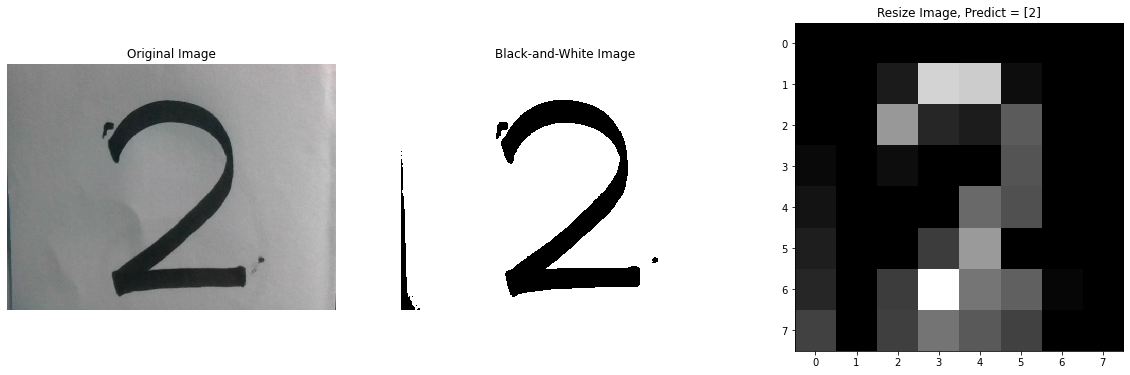

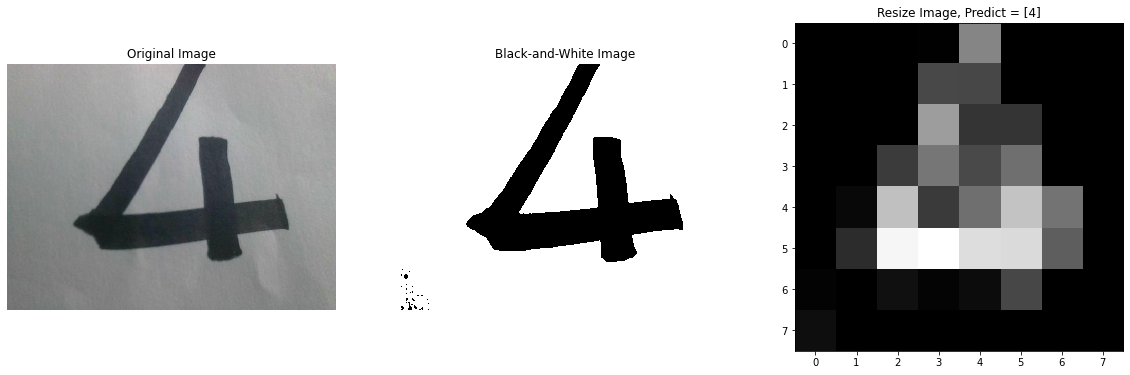

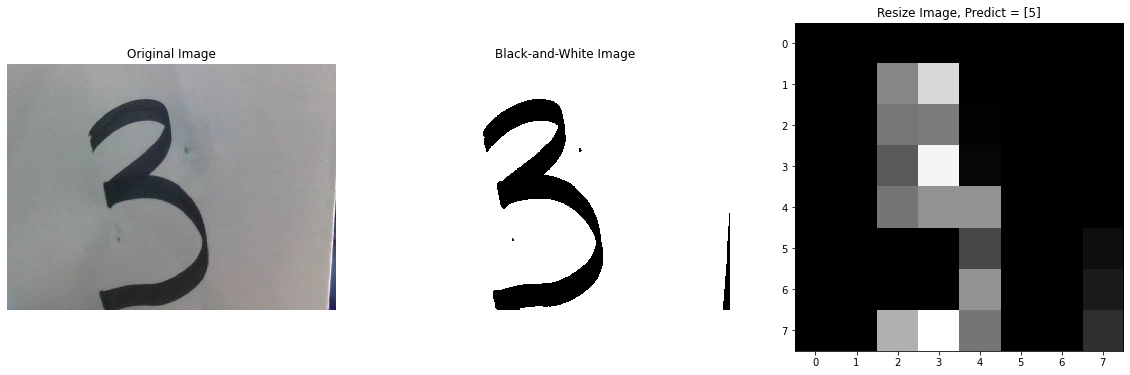

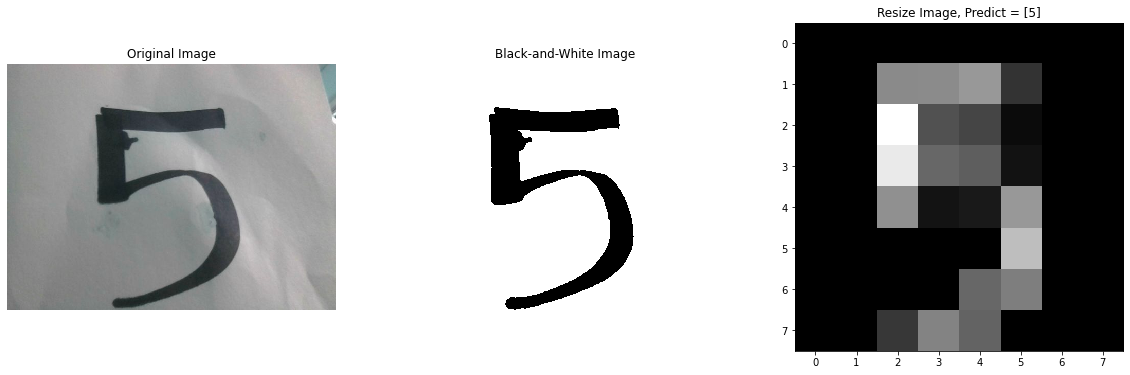

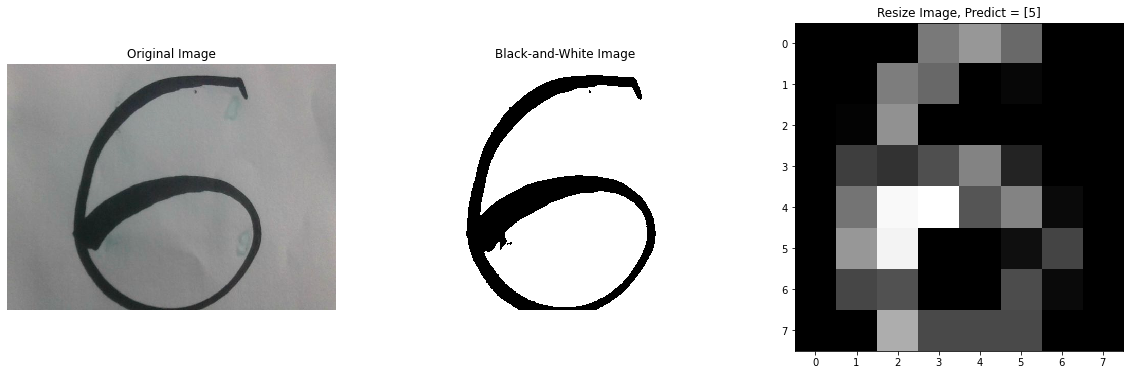

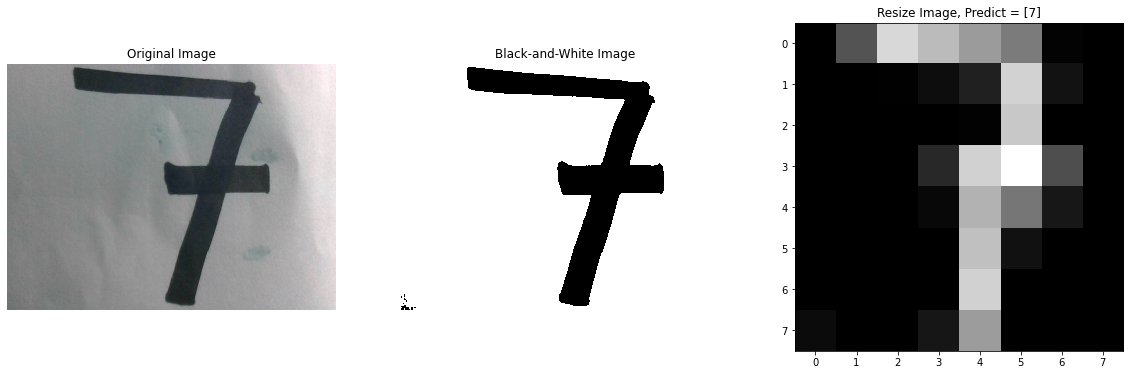

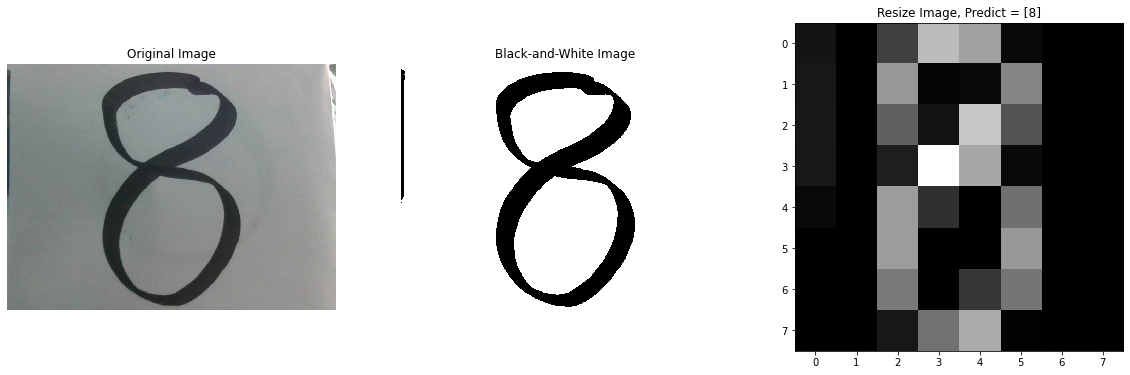

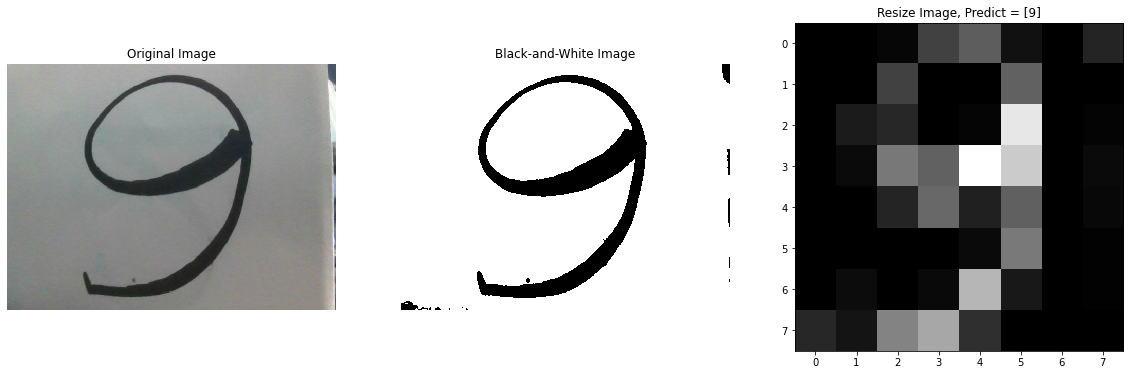

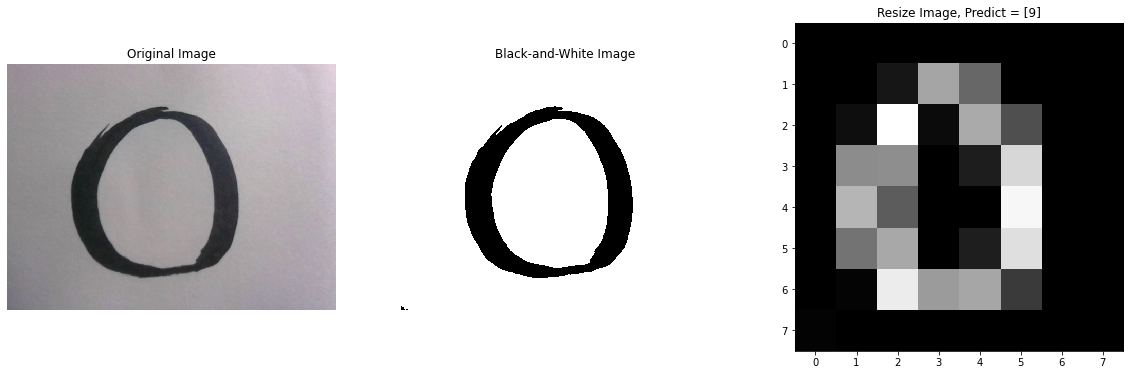

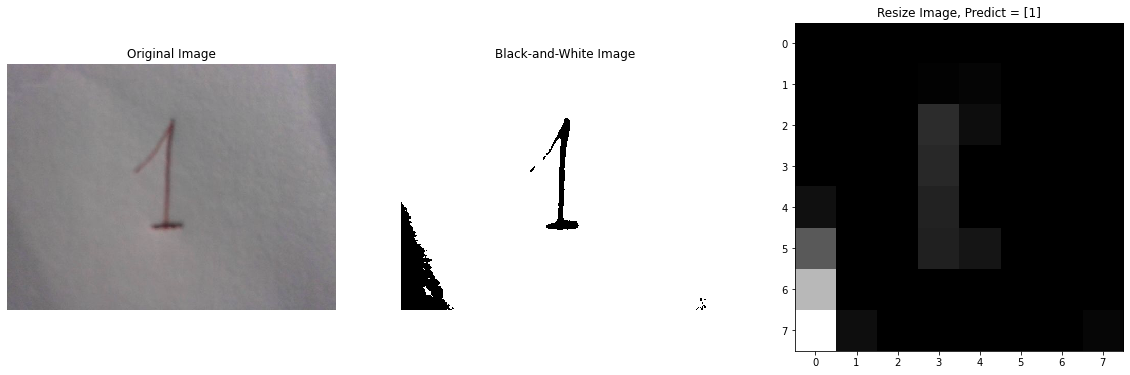

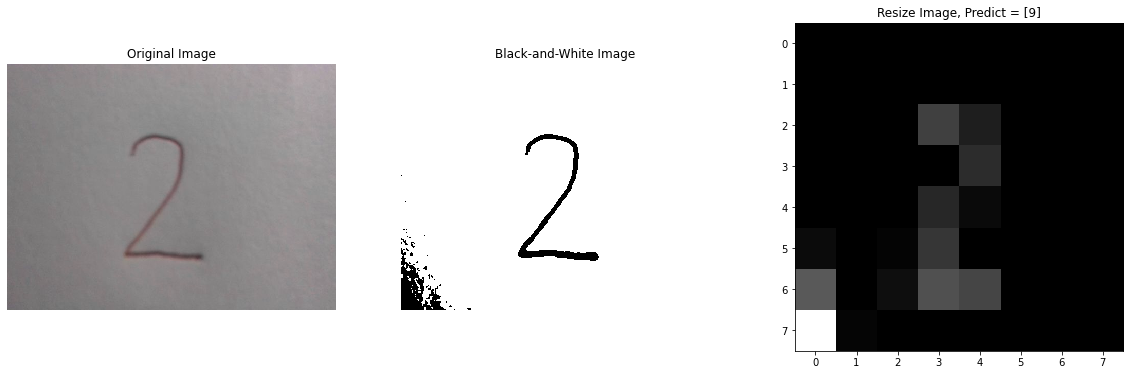

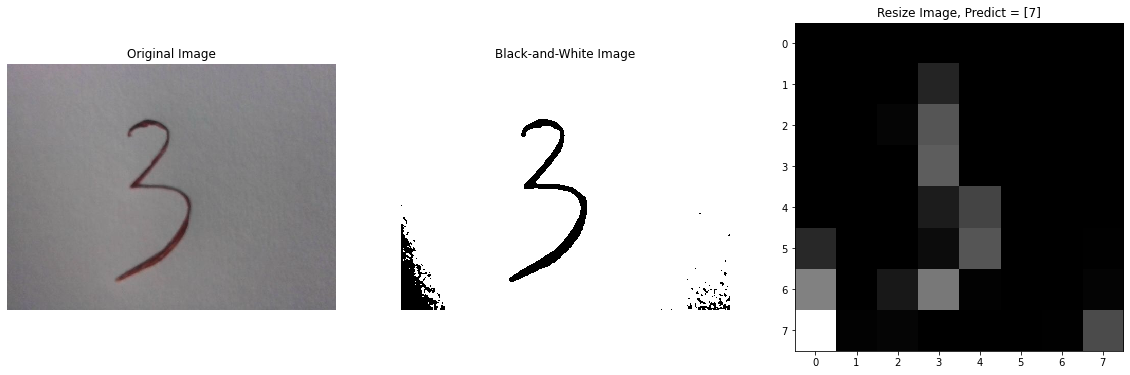

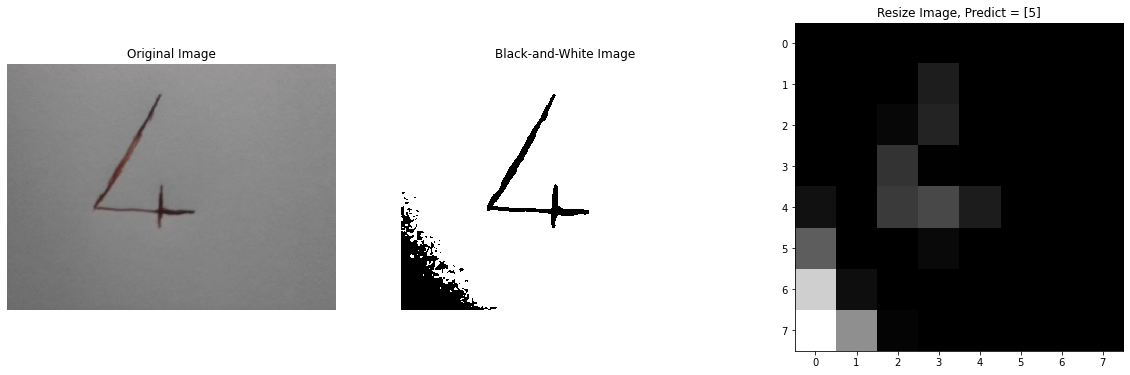

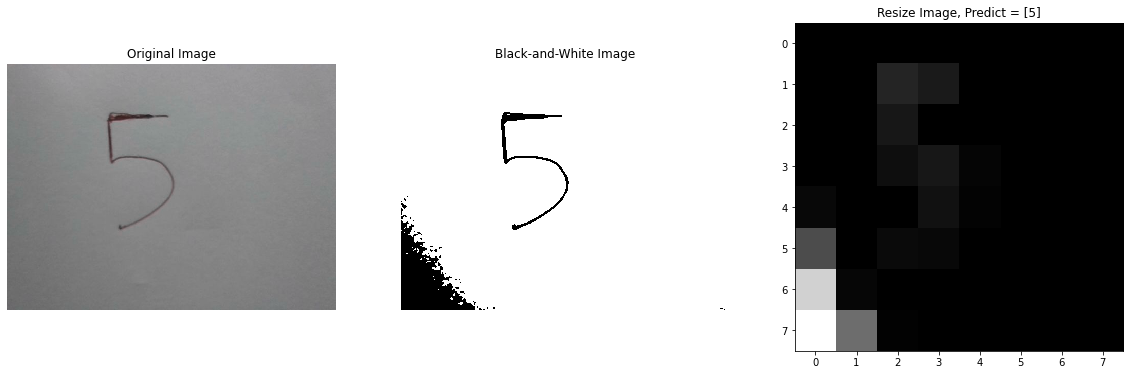

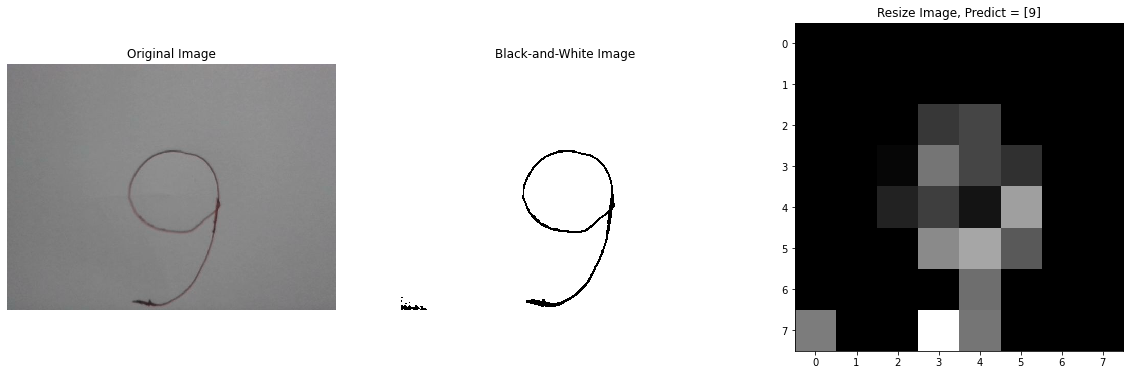

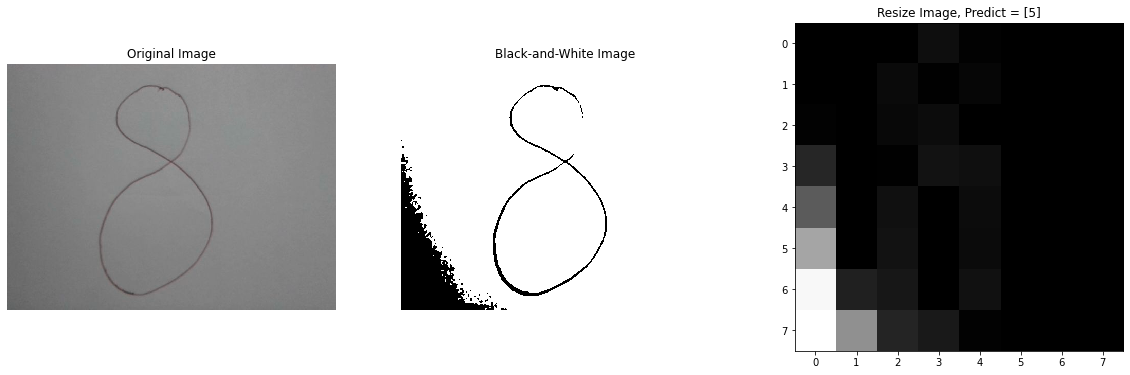

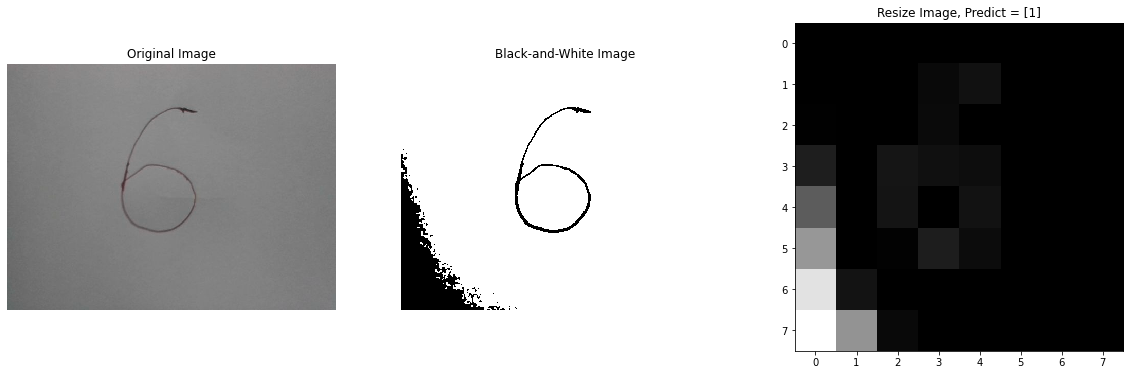

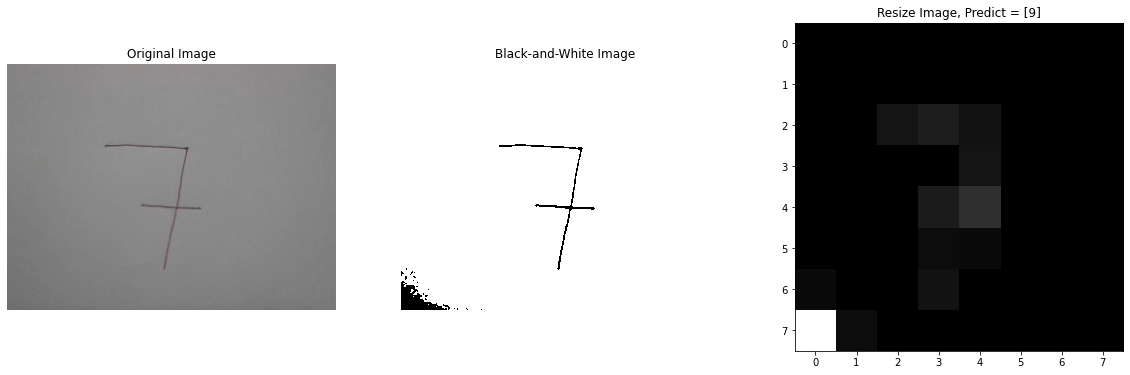

In [ ]:
import os
from google.colab.patches import cv2_imshow

# Lấy đường link truy cập vào dataset ảnh từ drive
# Link ảnh từ drive: https://drive.google.com/drive/u/0/folders/1YX0KhCEit3uSWiPxWfOeqDFQClQGH7My
link_drive = '/content/drive/MyDrive/Data_Images/'
all_datas = os.listdir(link_drive)
# Số lượng ảnh từ drive
n_images = len(all_datas)
print("Số lượng ảnh từ drive:", n_images)
for i in range(n_images):
  image = cv2.imread(link_drive + all_datas[i])
  _, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
  ax = axes[0]
  ax.set_axis_off()
  #image = cv2.resize(image,(250,350), interpolation = cv2.INTER_AREA)
  ax.imshow(image, interpolation='nearest')
  ax.set_title(f'Original Image')
  ax = axes[1]
  ax.set_axis_off()
  # Đọc ảnh thang độ xám
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image_blur = cv2.GaussianBlur(image_gray,(5,5),0)

  #Chuyển đổi hình ảnh thang độ xám thành nhị phân
  im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)

  #Show ảnh đã xử lý
  ax.imshow(thre,cmap='gray', interpolation='nearest')
  ret,thresh2 = cv2.threshold(thre,127,255,cv2.THRESH_BINARY_INV)
  ax.imshow(thresh2,cmap='gray', interpolation='nearest')
  ax.set_title(f'Black-and-White Image')

  #Resize ảnh
  ax = axes[2]

  a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)
  a = a/255 * 13
  plt.imshow(a, cmap = 'gray', interpolation='nearest')
  a = a.reshape(1, 64)
  
  #Predict Image
  predict = clf.predict(a)
  ax.set_title(f'Resize Image, Predict = {predict}')


#Trả lời các câu hỏi yêu cầu:


- Số trường hợp đúng: 10/20

1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
- Kết quả chạy thực tế với webcam của laptop và giấy viết tay cho ra kết quả **Không tốt**




2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?
- Kết quả chạy thực tế không tốt vì số trường hợp dự đoán đúng quá thấp(50%).
- Số trường hợp đúng thường sẽ rơi vào trường hợp được ghi bằng bút lông có nét chữ đậm.


3. Nếu không tốt thì lý do tại sao?
- Nét chữ bút bi không đủ đậm bằng bút lông nên khi resize ảnh bằng bút bi sẽ không được tốt.
    - Kết quả từ bút lông:
    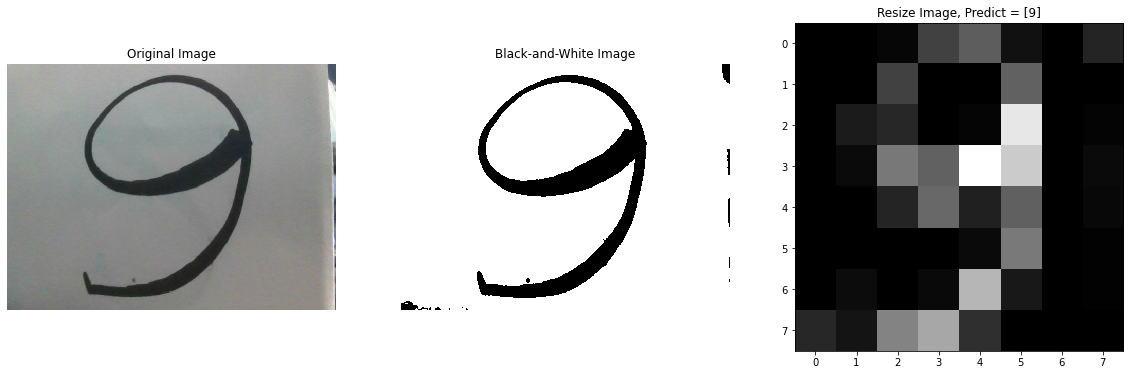
    - Kết quả từ bút bi:
    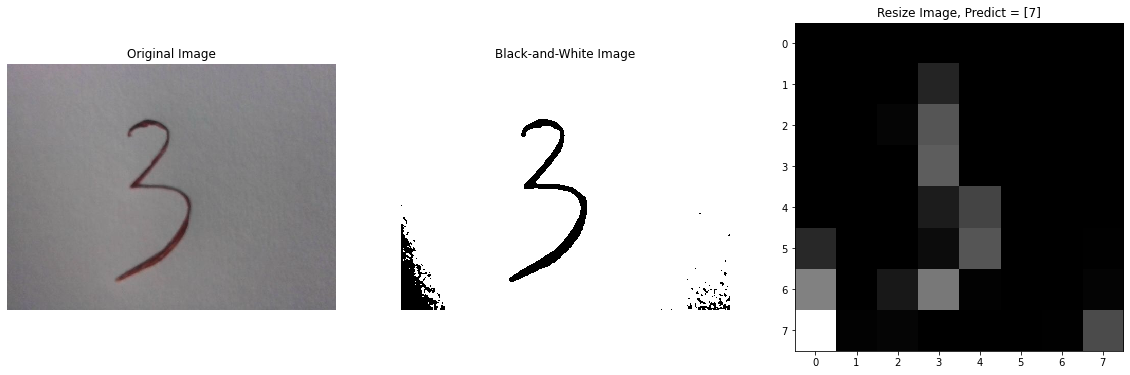

- Camera không tốt làm ảnh không đủ nét.
- Ảnh bị thiếu độ sáng nên khi resize bị mất dữ liệu.
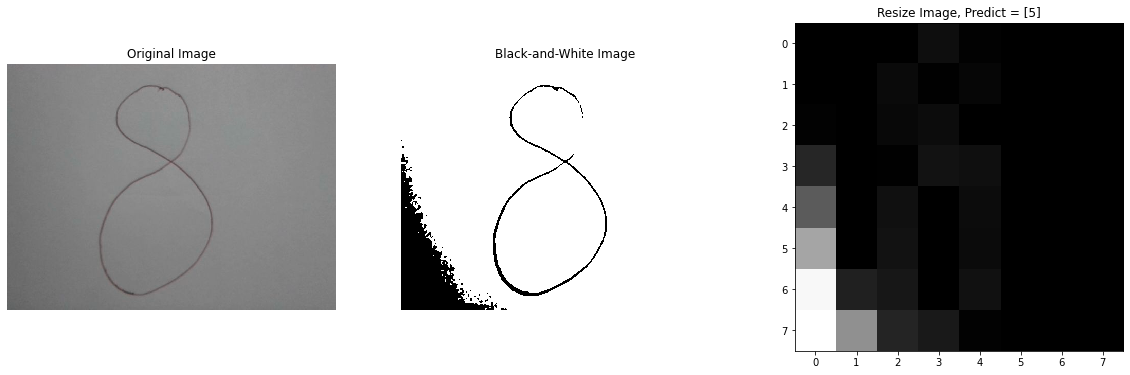

4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
- Không thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà.
- Nếu muốn sử dụng nó thì buộc lòng phải có bộ test và môi trường tốt hơn, bài toán nhận dạng biển số nhà mang nặng tính thực tế nên nếu áp dụng thì kết quả sẽ không được tốt